In [4]:
# Ejercicio 1:
def fun(k):
    #función f como en la Lectura breve 1
    if k not in NN or k == 0: 
        print('input not valid', k); 
        return None # números no válidos
    elif k%2: return (3*k+1) #caso impar
    else: return k/2         #caso par

# parte 1:
def fLista(nn, m):
    u'''devuelve la lista [n, F_f(1, n), . . . , F_f(m, n)].'''
    if nn not in NN or nn == 0: 
        print('input not valid', nn); 
        return None # números no válidos
    L = [nn]
    while m:
        nn = fun(nn)
        L += [nn]
        m -= 1
    return L

In [5]:
fLista(5, 5), fLista(7, 12)

([5, 16, 8, 4, 2, 1], [7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16])

In [6]:
#parte 2:
def ord_f(nn):
    u'''Devuelve el número de veces que hay que aplicar 
    f hasta llegar a 1 por primera vez desde nn'''
    if nn not in NN or nn == 0: 
        print('input not valid', nn); 
        return None # números no válidos
    m = 0
    while nn - 1: # parar cuando nn==1
        m, nn = (m+1), fun(nn)
    return m

In [7]:
ord_f(3^23)

91

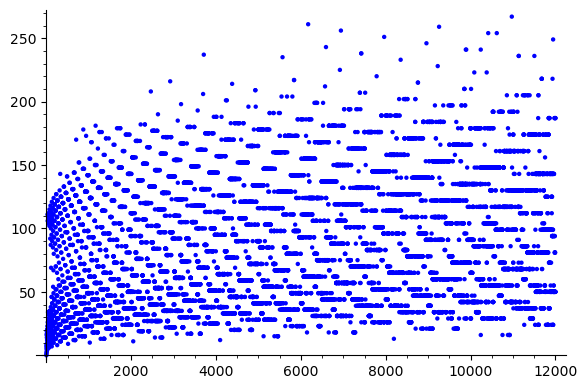

In [8]:
# parte 3:
M = 12000
Puntos = [(j, ord_f(j)) for j in [1..M]] 
points(Puntos)

In [9]:
max([p[1] for p in Puntos]) #menor que 300, podemos empezar a mirar por 12000

267

In [10]:
# parte 4:
k = M + 1
while ord_f(k) != 300:
    k += 1
print('Número encontrado: %d'%k)

Número encontrado: 250151


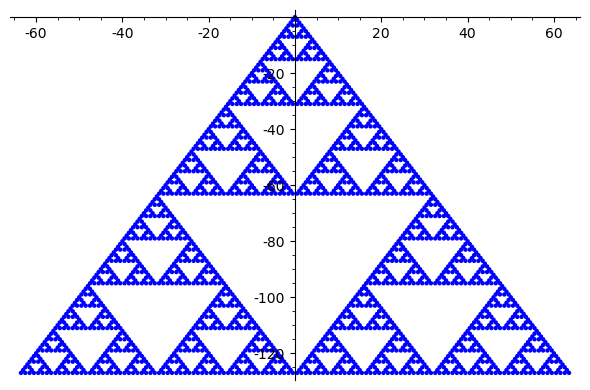

In [12]:
# Parte 1
Puntos2, M2 = [], (2^7)
for m in range(M2):
    Puntos2 += [(k-m/2, -m) for k in range(m+1) if (binomial(m,k)%2)]
points(Puntos2)

Parte 2:

Para esta parte, podemos utilizar los enteros (int) de python y sus operadores bit a bit 
(bitwise operators). 

Por el teorema de Lucas, si un bit de $m$ es $0$ y el correspondiente bit de k es $1$, entonces el binomial($m$, $k$) será par.

Para comprobar esto podemos ver si $((\neg m)\land k) = 0$, donde $m$ y $k$ son las representaciones en binario de $m$ y $k$. En caso de que sea así, el binomial será impar, ya que no se cumple que algún bit de $m$ sea 1 y el correspondiente de $k$ sea 0.

In [13]:
#parte 2
def es_par(m, k):
    u'''True ssi el binomial(m, k) es par'''
    return int(~int(m))&int(k) != 0 
# nota: a efectos prácticos, se puede omitir el "!= 0" final, ya que en caso de no ser
#  igual a 0, se evalúa como true, pero el ejercicio dice específicamente 
#  que hay que devolver True o False.

In [14]:
es_par(1501,213), es_par(2^7, 4), all([not es_par(2^7-1,j) for j in range(2^7)])

(False, True, True)

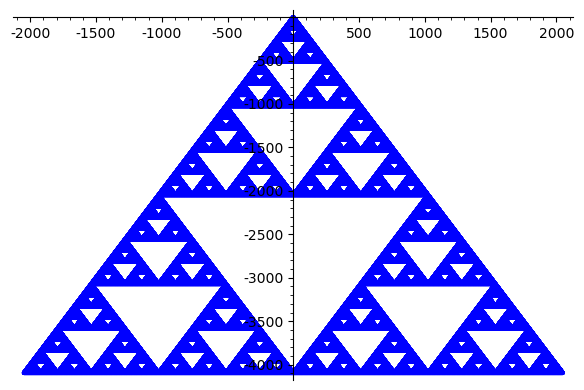

In [15]:
Puntos3, M3 = [], (2^12)
for m in range(M3):
    Puntos3 += [(k-m/2, -m) for k in range(m+1) if not es_par(m, k)]
points(Puntos3)

In [2]:
def DigitosN(z, b = 10):
    if b not in NN or b<=1:
        print('La base tiene que ser un natural mayor a 1.')
        return None
    L = []
    while z:
        L.insert(0, z%b) # lo ponemos al principio de la lista, 
        z = z//b         # porque es más significativo
    return L if len(L) else [0]

In [3]:
DigitosN(300)

[3, 0, 0]

In [19]:
def getab(L):
    u'''dada una lista como la que devuelve DigitosN,
    devuelve la lista siguiente como en el ejercicio.
    Es decir: ab(a+b), los tre números concatenados'''
    b = sum([j%2 for j in L])
    a = len(L) - b
    return (DigitosN(a) + DigitosN(b) + DigitosN(a+b))

In [23]:
getab(DigitosN(5050505050501)), getab([1]*30), getab([2]*30)

([6, 7, 1, 3], [0, 3, 0, 3, 0], [3, 0, 0, 3, 0])

In [21]:
#parte 1
def generaLista(m = 10^6):
    return [randint(0,9) for j in range(m)]

In [28]:
# función de la parte 2:
def numPasos(L):
    u'''recibe una lista y devuelve el número de pasos hasta que se hace [1,2,3]'''
    count,fin = 0,[1,2,3]
    while L != fin:
        count += 1
        L = getab(L)
    return count

In [31]:
#parte 1, usamos la función anterior:
M = 10^6 # longitud de los números
for _ in range(5): #probamos 5 números largos
    print(numPasos(generaLista(M)))

4
4
4
4
4


In [40]:
print(numPasos(generaLista(M*10)))#uno más grande

4


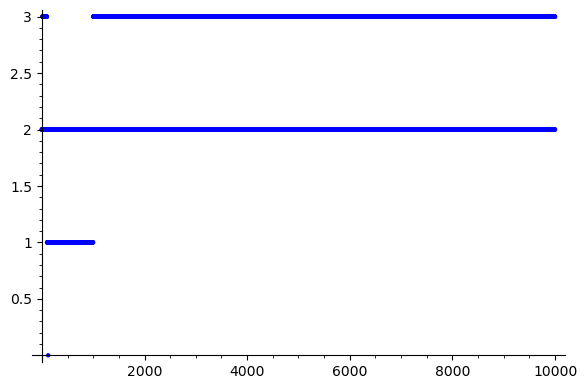

In [41]:
#parte 2: usando la función numPasos de antes:
M4 = 10^4
Puntos4 = [(j, numPasos(DigitosN(j,10))) for j in range(M4)]
points(Puntos4)

In [53]:
#otra opción usando .digits()
def getab2(L):
    u'''dada una lista como la que devuelve DigitosN,
    devuelve la lista siguiente como en el ejercicio.
    Es decir: ab(a+b), los tre números concatenados'''
    b = sum([j%2 for j in L])
    a = len(L) - b
    return (a.digits(base=10) + b.digits(base=10) + (a+b).digits(base=10))
def numPasos2(L):
    u'''recibe una lista y devuelve el número de pasos hasta que se hace [1,2,3]'''
    count,fin = 0,[3,2,1]
    while L != fin:
        count += 1
        L = getab2(L)
    return count
M4 = 10^4
Puntos4 = []
j = 0
while j < M4: Puntos4.append((j, numPasos2(j.digits(base=10))))
points(Puntos4)

AttributeError: 'int' object has no attribute 'digits'

In [54]:
[(NN(j)).digits(base =10) for j in 12..123]

SyntaxError: Generator expression must be parenthesized (<ipython-input-54-2fb160a9879f>, line 1)

In [57]:
binomial(0,0)

1